# Linear Regression

In this notebook, the Multiple Linear Regression Model is used with 4 different target variables.
1. Total Confirmed Cases
2. Total Deaths
3. Confirmed Cases Rate per 1000
4. Death Rate 1000

<b> Table of Contents: </b>
<br> [Import and Load the Dataset](#0000)
<br> [LinReg with Target Var 'Total Confirmed Cases'](#1000)
<br> [LinReg with Target Var 'Total Death'](#2000)
<br> [LinReg with Target Var 'Case Rate per 1000'](#3000)
<br> [LinReg with Target Var 'Death Rate 1000'](#4000)
<br> [Top 20 Features and Target Variable 'Covid Case Rate''](#5000)

___
<a id = "0000"> <h2> Import and Load the Dataset </h2> </a>

In [1]:
import pandas as pd  
import numpy as np  
import seaborn as sns
import copy
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn import metrics
from scipy  import stats
sns.set()
%matplotlib inline

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

import warnings

/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

___
<a id = "1000"> <h2> LinReg with Target Var 'Total Confirmed Cases' </h2> </a>

In [2]:
data = pd.read_csv('final_linreg_data.csv')  # load data set
data.head()

,Total Population_iqr_bc,Total Citizen Educated in US_iqr_bc,Citizen Less than High School Education_iqr_bc,Citizen High School Graduate_iqr_bc,Citizen Some College Education_iqr_bc,Citizen College Degree_iqr_bc,Total Citizen Income_iqr_bc,Citizen No Income_iqr_bc,Citizen Income 1-9999_iqr_bc,Citizen Income 10000-14999_iqr_bc,...,Median Age_iqr_bc,Male Median Age_iqr_bc,Female Median Age_iqr_bc,Average Household Size_iqr_bc,Total Confirmed Cases,Total Deaths,Case Rate per 1000,Death Rate 1000,Case Rate Categories,Death Rate Categories
0,25.393962,23.030193,24.630089,24.000518,16.479497,11.490486,23.869015,23.328267,18.421893,18.524565,...,59.875297,29.414196,125.477485,0.485672,0,0,7.330,0.147,2,2
1,30.283200,27.544206,32.281033,29.739068,19.840588,13.344409,28.533103,28.987045,23.185884,23.295029,...,67.920227,32.739371,146.423770,0.400228,400,8,2.200,0.049,2,1
2,22.442567,20.339793,25.234875,20.874192,14.224701,9.259826,21.010093,20.802075,17.276611,16.807982,...,63.780229,30.445959,143.443501,0.400228,401,9,9.579,0.036,3,1
3,21.710978,19.785503,21.762171,21.157500,13.783455,9.124356,20.468259,21.055584,15.740163,15.279015,...,61.432726,29.890687,133.158383,0.485672,263,1,5.280,0.044,2,1
4,25.616212,23.322729,28.541406,24.157094,17.176145,10.728366,24.091943,26.050817,18.203866,18.405152,...,63.780229,31.079735,135.586434,0.485672,121,1,2.268,0.017,2,1


In [5]:
# trim the spaces of the cells from the csv file
data.columns = data.columns.to_series().apply(lambda x: x.strip())

In [6]:
# test output of specific column
data[['Citizen Income 10000-14999_iqr_bc']]

,Citizen Income 10000-14999_iqr_bc
0,18.524565
1,23.295029
2,16.807982
3,15.279015
4,18.405152
...,...
3134,16.738793
3135,13.850096
3136,13.786032
3137,11.453054


# Build the Model

In [19]:
# divide the dataset into attributes and lables 
# x variable contains all the attributes/features-- took out Age bc float type
# y varaible contains labels

features = ['Total Population_iqr_bc',
                        'Total Citizen Educated in US_iqr_bc','Citizen Less than High School  Education_iqr_bc',
                        'Citizen High School  Graduate_iqr_bc','Citizen Some College  Education_iqr_bc',
                         'Citizen College Degree_iqr_bc','Total Citizen Income_iqr_bc','Citizen No Income_iqr_bc',
                          'Citizen Income 1-9999_iqr_bc','Citizen Income 10000-14999_iqr_bc','Citizen Income 15000-24999_iqr_bc',
                         'Citizen Income 25000-34999_iqr_bc','Citizen Income 35000-49999_iqr_bc',
                        'Citizen Income 50000-64999_iqr_bc','Citizen Income over 75000_iqr_bc',
                        'Hispanic or Latino_iqr_bc','Median Age_iqr_bc',
                         'Male Median Age_iqr_bc', 'Female Median Age_iqr_bc',
                       'Average Household Size_iqr_bc']

X = data[features]
y = data['Total Confirmed Cases']

In [20]:
# splait data set 
# split 80% of the data to the training set while 20% of the data to test set using below code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)

In [21]:
# train our model
regressor = LinearRegression() 

# fit the model
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

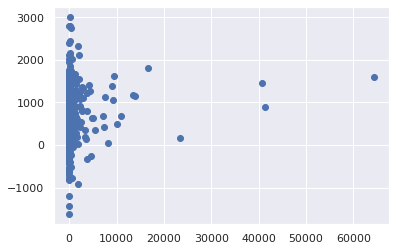

In [22]:
predictions = regressor.predict(X_test)

plt.scatter(y_test,predictions)

___
# Exploring the Output

In [23]:
# get the intercept and coef
intercept = regressor.intercept_

In [24]:
coef = regressor.coef_

In [25]:
# print the intercept of the model
print('The intercept of our model is {:.4}'.format(intercept))
print('-'*100)

# loop through the dict and print the coef for each variable
for cf in zip(X.columns, coef):
    print('The Coefficient for {} is {:.2}'.format(cf[0],cf[1]))

The intercept of our model is -8.816e+03
----------------------------------------------------------------------------------------------------
The Coefficient for Total Population_iqr_bc is 1.4e+03
The Coefficient for Total Citizen Educated in US_iqr_bc is -6.7e+02
The Coefficient for Citizen Less than High School  Education_iqr_bc is -4.3e+01
The Coefficient for Citizen High School  Graduate_iqr_bc is -9e+01
The Coefficient for Citizen Some College  Education_iqr_bc is -4.8e+01
The Coefficient for Citizen College Degree_iqr_bc is -2.8e+02
The Coefficient for Total Citizen Income_iqr_bc is 4.7e+02
The Coefficient for Citizen No Income_iqr_bc is 1.9e+01
The Coefficient for Citizen Income 1-9999_iqr_bc is -3.4e+02
The Coefficient for Citizen Income 10000-14999_iqr_bc is -1.3e+02
The Coefficient for Citizen Income 15000-24999_iqr_bc is 2.4e+01
The Coefficient for Citizen Income 25000-34999_iqr_bc is -4.1e+02
The Coefficient for Citizen Income 35000-49999_iqr_bc is -5.2e+01
The Coefficient 

In [26]:
# mutlivariable lin reg, reg model will show the most optimal coefficients for all attributes 
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Total Population_iqr_bc,1442.137215
Total Citizen Educated in US_iqr_bc,-667.438847
Citizen Less than High School Education_iqr_bc,-43.359867
Citizen High School Graduate_iqr_bc,-89.648440
Citizen Some College Education_iqr_bc,-47.605549
Citizen College Degree_iqr_bc,-281.874918
Total Citizen Income_iqr_bc,468.783135
Citizen No Income_iqr_bc,19.449737
Citizen Income 1-9999_iqr_bc,-338.490269
Citizen Income 10000-14999_iqr_bc,-129.229150


# Evaluating the Model

In [27]:
# predicition on the test data
y_pred = regressor.predict(X_test)
y_pred

array([ 8.09878769e+01,  4.85447988e+02,  3.17811905e+02,  1.55482251e+03,
        9.59869462e+02,  1.04211084e+03,  1.03868511e+03,  8.97192032e+02,
       -7.83259724e+02,  6.01055493e+02, -6.60198304e+01,  5.36642894e+02,
        3.65280057e+02,  9.03837733e+02,  8.85949546e+02,  9.78335328e+02,
        1.23833799e+03,  7.82600243e+02,  7.61727586e+02,  6.77303788e+02,
        8.99892529e+02,  4.44106011e+02,  6.79895966e+02,  1.55983184e+02,
        9.10866353e+02,  4.56031447e+02,  7.85748220e+02,  1.39607434e+02,
        2.88624843e+02,  7.21013390e+02,  1.46140853e+03,  7.97664509e+02,
        6.80348512e+02,  5.23548564e+02,  7.18991777e+02,  1.09783634e+03,
        3.06259532e+02,  7.91466913e+02, -7.11144422e+02,  8.52764550e+02,
        1.33978922e+02,  1.44667075e+03,  1.04629531e+03,  7.93385603e+02,
        8.30579999e+02,  1.53999867e+03,  1.00326921e+03,  4.20328040e+02,
        1.11867479e+03,  4.03405095e+02,  3.79416073e+02,  1.01354851e+03,
       -2.24737823e+02,  

In [28]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

df1

,Actual,Predicted
1693,57,80.987877
398,72,485.447988
939,0,317.811905
2289,68,1554.822513
1329,115,959.869462
2642,0,1042.110838
2312,277,1038.685112
1856,41349,897.192032
276,31,-783.259724
602,79,601.055493


In [29]:
# dont have to print 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1124.68176521094
Mean Squared Error: 14854265.129759898
Root Mean Squared Error: 3854.1231337049803


In [30]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                              OLS Regression Results                             
Dep. Variable:     Total Confirmed Cases   R-squared:                       0.025
Model:                               OLS   Adj. R-squared:                  0.018
Method:                    Least Squares   F-statistic:                     3.924
Date:                   Sun, 21 Jun 2020   Prob (F-statistic):           9.46e-09
Time:                           22:47:00   Log-Likelihood:                -30072.
No. Observations:                   3139   AIC:                         6.019e+04
Df Residuals:                       3118   BIC:                         6.031e+04
Df Model:                             20                                         
Covariance Type:               nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

/opt/tljh/user/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


___
<a id = "2000"> <h2> LinReg with Target Var 'Total Deaths' </h2> </a>

# Build the Model

In [31]:
# divide the dataset into attributes and lables 
# x variable contains all the attributes/features-- took out Age bc float type
# y varaible contains labels
features = ['Total Population_iqr_bc',
                        'Total Citizen Educated in US_iqr_bc','Citizen Less than High School  Education_iqr_bc',
                        'Citizen High School  Graduate_iqr_bc','Citizen Some College  Education_iqr_bc',
                         'Citizen College Degree_iqr_bc','Total Citizen Income_iqr_bc','Citizen No Income_iqr_bc',
                          'Citizen Income 1-9999_iqr_bc','Citizen Income 10000-14999_iqr_bc','Citizen Income 15000-24999_iqr_bc',
                         'Citizen Income 25000-34999_iqr_bc','Citizen Income 35000-49999_iqr_bc',
                        'Citizen Income 50000-64999_iqr_bc','Citizen Income over 75000_iqr_bc',
                        'Hispanic or Latino_iqr_bc','Median Age_iqr_bc',
                         'Male Median Age_iqr_bc', 'Female Median Age_iqr_bc',
                       'Average Household Size_iqr_bc']


X = data[features]
y = data['Total Deaths']

In [32]:
# splait data set 
# split 80% of the data to the training set while 20% of the data to test set using below code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)

In [33]:
# train our model
regressor = LinearRegression() 

# fit the model
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

___
# Exploring the Output

In [34]:
# get the intercept and coef
intercept = regressor.intercept_

In [35]:
coef = regressor.coef_

In [36]:
# print the intercept of the model
print('The intercept of our model is {:.4}'.format(intercept))
print('-'*100)

# loop through the dict and print the coef for each variable
for cf in zip(X.columns, coef):
    print('The Coefficient for {} is {:.2}'.format(cf[0],cf[1]))

The intercept of our model is -496.5
----------------------------------------------------------------------------------------------------
The Coefficient for Total Population_iqr_bc is 8.8e+01
The Coefficient for Total Citizen Educated in US_iqr_bc is -3.3e+01
The Coefficient for Citizen Less than High School  Education_iqr_bc is -6.3
The Coefficient for Citizen High School  Graduate_iqr_bc is 0.14
The Coefficient for Citizen Some College  Education_iqr_bc is -1.5e+01
The Coefficient for Citizen College Degree_iqr_bc is -1.8e+01
The Coefficient for Total Citizen Income_iqr_bc is -5.7
The Coefficient for Citizen No Income_iqr_bc is 4.5
The Coefficient for Citizen Income 1-9999_iqr_bc is -9.7
The Coefficient for Citizen Income 10000-14999_iqr_bc is -4.5
The Coefficient for Citizen Income 15000-24999_iqr_bc is 1.5
The Coefficient for Citizen Income 25000-34999_iqr_bc is -2.1e+01
The Coefficient for Citizen Income 35000-49999_iqr_bc is 1e+01
The Coefficient for Citizen Income 50000-64999_i

In [37]:
# mutlivariable lin reg, reg model will show the most optimal coefficients for all attributes 
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Total Population_iqr_bc,87.783637
Total Citizen Educated in US_iqr_bc,-32.792272
Citizen Less than High School Education_iqr_bc,-6.310997
Citizen High School Graduate_iqr_bc,0.139787
Citizen Some College Education_iqr_bc,-15.396933
Citizen College Degree_iqr_bc,-18.359510
Total Citizen Income_iqr_bc,-5.744061
Citizen No Income_iqr_bc,4.506571
Citizen Income 1-9999_iqr_bc,-9.658931
Citizen Income 10000-14999_iqr_bc,-4.535066


# Evaluating the Model

In [38]:
# predicition on the test data
y_pred = regressor.predict(X_test)
y_pred

array([ 4.75836302e+00,  1.80410180e+01,  2.28313189e+01,  9.70947139e+01,
        5.23509558e+01,  6.35775082e+01,  6.04504392e+01,  5.31247728e+01,
       -4.65796432e+01,  4.35165949e+01, -5.98464307e+00,  3.57513205e+01,
        1.25735247e+01,  5.49819355e+01,  5.48134683e+01,  7.81998646e+01,
        6.49770548e+01,  4.37705383e+01,  2.43652222e+01,  4.48434939e+01,
        4.18695599e+01,  2.89683178e+01,  4.00755751e+01,  1.81340972e+01,
        5.54800038e+01,  1.59566689e+01,  5.50542777e+01,  7.73956577e+00,
       -2.64626835e+01,  3.86580594e+01,  9.12472974e+01,  3.61433899e+01,
        4.00969644e+01,  2.42432411e+01,  2.71887740e+01,  6.69838939e+01,
        3.97306129e+00,  4.86496225e+01, -3.88250415e+01,  5.16781243e+01,
        6.11372164e+00,  8.63481017e+01,  4.36960053e+01,  5.20373118e+01,
        3.20053611e+01,  8.97255662e+01,  6.52305900e+01,  1.91387399e+01,
        6.54237784e+01,  2.50166726e+01,  2.19437510e+01,  6.87970348e+01,
       -3.27697577e+01,  

In [39]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

df1

,Actual,Predicted
1693,11,4.758363
398,2,18.041018
939,0,22.831319
2289,1,97.094714
1329,0,52.350956
2642,0,63.577508
2312,1,60.450439
1856,2171,53.124773
276,3,-46.579643
602,0,43.516595


In [40]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 66.47789022082574
Mean Squared Error: 91941.2937879819
Root Mean Squared Error: 303.2182279942647


In [41]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           Total Deaths   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     3.084
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           4.54e-06
Time:                        22:48:03   Log-Likelihood:                -21831.
No. Observations:                3139   AIC:                         4.370e+04
Df Residuals:                    3118   BIC:                         4.383e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

/opt/tljh/user/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


___
<a id = "3000"> <h2> LinReg with Target Var 'Case Rate per 1000' </h2> </a>

# Build the Model

In [42]:
# divide the dataset into attributes and lables 
# x variable contains all the attributes/features-- took out Age bc float type
# y varaible contains labels
features = ['Total Population_iqr_bc',
                        'Total Citizen Educated in US_iqr_bc','Citizen Less than High School  Education_iqr_bc',
                        'Citizen High School  Graduate_iqr_bc','Citizen Some College  Education_iqr_bc',
                         'Citizen College Degree_iqr_bc','Total Citizen Income_iqr_bc','Citizen No Income_iqr_bc',
                          'Citizen Income 1-9999_iqr_bc','Citizen Income 10000-14999_iqr_bc','Citizen Income 15000-24999_iqr_bc',
                         'Citizen Income 25000-34999_iqr_bc','Citizen Income 35000-49999_iqr_bc',
                        'Citizen Income 50000-64999_iqr_bc','Citizen Income over 75000_iqr_bc',
                        'Hispanic or Latino_iqr_bc','Median Age_iqr_bc',
                         'Male Median Age_iqr_bc', 'Female Median Age_iqr_bc',
                       'Average Household Size_iqr_bc']


X = data[features]
y = data['Case Rate per 1000']

In [43]:
# splait data set 
# split 80% of the data to the training set while 20% of the data to test set using below code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)

In [44]:
# train our model
regressor = LinearRegression() 

# fit the model
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

___
# Exploring the Output

In [45]:
# get the intercept and coef
intercept = regressor.intercept_

In [46]:
coef = regressor.coef_

In [47]:
# print the intercept of the model
print('The intercept of our model is {:.4}'.format(intercept))
print('-'*100)

# loop through the dict and print the coef for each variable
for cf in zip(X.columns, coef):
    print('The Coefficient for {} is {:.2}'.format(cf[0],cf[1]))

The intercept of our model is -3.952
----------------------------------------------------------------------------------------------------
The Coefficient for Total Population_iqr_bc is -0.089
The Coefficient for Total Citizen Educated in US_iqr_bc is -2.2
The Coefficient for Citizen Less than High School  Education_iqr_bc is 1.0
The Coefficient for Citizen High School  Graduate_iqr_bc is -0.66
The Coefficient for Citizen Some College  Education_iqr_bc is -0.63
The Coefficient for Citizen College Degree_iqr_bc is 0.65
The Coefficient for Total Citizen Income_iqr_bc is 6.1
The Coefficient for Citizen No Income_iqr_bc is -0.48
The Coefficient for Citizen Income 1-9999_iqr_bc is -1.9
The Coefficient for Citizen Income 10000-14999_iqr_bc is -1.2
The Coefficient for Citizen Income 15000-24999_iqr_bc is -1.1
The Coefficient for Citizen Income 25000-34999_iqr_bc is 0.95
The Coefficient for Citizen Income 35000-49999_iqr_bc is -1.1
The Coefficient for Citizen Income 50000-64999_iqr_bc is -0.15


In [48]:
# mutlivariable lin reg, reg model will show the most optimal coefficients for all attributes 
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Total Population_iqr_bc,-0.089385
Total Citizen Educated in US_iqr_bc,-2.204286
Citizen Less than High School Education_iqr_bc,1.047671
Citizen High School Graduate_iqr_bc,-0.662177
Citizen Some College Education_iqr_bc,-0.626724
Citizen College Degree_iqr_bc,0.650390
Total Citizen Income_iqr_bc,6.127686
Citizen No Income_iqr_bc,-0.481443
Citizen Income 1-9999_iqr_bc,-1.861433
Citizen Income 10000-14999_iqr_bc,-1.173066


# Evaluating the Model

In [49]:
# predicition on the test data
y_pred = regressor.predict(X_test)
y_pred

array([-4.57803260e-01,  7.90063367e+00,  6.83356531e-01,  5.85035905e+00,
        3.95306558e-01,  6.12444341e+00,  5.15589651e+00,  4.00567636e+00,
        3.34203787e+00,  7.87923734e-01,  4.01061237e+00, -5.29152502e-02,
        4.30438745e+00,  6.92318689e+00,  5.49070316e+00,  7.17078868e+00,
        1.06418780e-01,  1.03604378e+00,  6.10214313e+00,  1.50426350e+00,
       -9.93551426e-01,  2.57852239e+00,  2.78261122e+00,  7.33027476e+00,
        1.34395042e-01,  6.60947278e+00,  3.25852741e+00,  3.59343448e+00,
        6.32026803e+00,  6.00097912e+00,  6.24798544e+00,  7.22361164e+00,
        6.29030336e+00,  1.70318885e+00,  3.70236843e+00,  4.06856733e+00,
        2.15873747e+00,  6.52204473e+00,  2.87107705e+00,  6.99542777e+00,
        4.24117820e+00,  4.50083420e+00,  6.28552068e+00,  9.12476788e+00,
        2.65107937e+00,  3.99864825e+00,  2.12361344e+00,  4.85289396e+00,
        5.56807490e+00,  3.44699991e+00,  7.55211107e+00,  3.87664883e+00,
        5.09322940e+00,  

In [50]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

df1

,Actual,Predicted
1693,0.000,-0.457803
398,6.711,7.900634
939,1.346,0.683357
2289,10.983,5.850359
1329,1.472,0.395307
2642,5.312,6.124443
2312,19.728,5.155897
1856,17.505,4.005676
276,5.746,3.342038
602,3.785,0.787924


In [51]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.348298766882169
Mean Squared Error: 36.93216805454087
Root Mean Squared Error: 6.077184220882305


In [52]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:     Case Rate per 1000   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     24.48
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           4.31e-84
Time:                        22:48:24   Log-Likelihood:                -10475.
No. Observations:                3139   AIC:                         2.099e+04
Df Residuals:                    3118   BIC:                         2.112e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

/opt/tljh/user/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


___
<a id = "4000"> <h2> LinReg with Target Var 'Death Rate 1000' </h2> </a>

# Build the Model

In [53]:
# divide the dataset into attributes and lables 
# x variable contains all the attributes/features-- took out Age bc float type
# y varaible contains labels
features = ['Total Population_iqr_bc',
                        'Total Citizen Educated in US_iqr_bc','Citizen Less than High School  Education_iqr_bc',
                        'Citizen High School  Graduate_iqr_bc','Citizen Some College  Education_iqr_bc',
                         'Citizen College Degree_iqr_bc','Total Citizen Income_iqr_bc','Citizen No Income_iqr_bc',
                          'Citizen Income 1-9999_iqr_bc','Citizen Income 10000-14999_iqr_bc','Citizen Income 15000-24999_iqr_bc',
                         'Citizen Income 25000-34999_iqr_bc','Citizen Income 35000-49999_iqr_bc',
                        'Citizen Income 50000-64999_iqr_bc','Citizen Income over 75000_iqr_bc',
                        'Hispanic or Latino_iqr_bc','Median Age_iqr_bc',
                         'Male Median Age_iqr_bc', 'Female Median Age_iqr_bc',
                       'Average Household Size_iqr_bc']

X = data[features]
y = data['Death Rate 1000']

In [54]:
# splait data set 
# split 80% of the data to the training set while 20% of the data to test set using below code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)

In [55]:
# train our model
regressor = LinearRegression() 

# fit the model
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

___
# Exploring the Output

In [56]:
# get the intercept and coef
intercept = regressor.intercept_

In [57]:
coef = regressor.coef_

In [58]:
# print the intercept of the model
print('The intercept of our model is {:.4}'.format(intercept))
print('-'*100)

# loop through the dict and print the coef for each variable
for cf in zip(X.columns, coef):
    print('The Coefficient for {} is {:.2}'.format(cf[0],cf[1]))

The intercept of our model is -0.3376
----------------------------------------------------------------------------------------------------
The Coefficient for Total Population_iqr_bc is 0.13
The Coefficient for Total Citizen Educated in US_iqr_bc is -0.039
The Coefficient for Citizen Less than High School  Education_iqr_bc is 0.022
The Coefficient for Citizen High School  Graduate_iqr_bc is -0.011
The Coefficient for Citizen Some College  Education_iqr_bc is -0.032
The Coefficient for Citizen College Degree_iqr_bc is 0.017
The Coefficient for Total Citizen Income_iqr_bc is -0.048
The Coefficient for Citizen No Income_iqr_bc is 0.0031
The Coefficient for Citizen Income 1-9999_iqr_bc is -0.0037
The Coefficient for Citizen Income 10000-14999_iqr_bc is -0.018
The Coefficient for Citizen Income 15000-24999_iqr_bc is -0.055
The Coefficient for Citizen Income 25000-34999_iqr_bc is -0.03
The Coefficient for Citizen Income 35000-49999_iqr_bc is -0.026
The Coefficient for Citizen Income 50000-64

In [59]:
# mutlivariable lin reg, reg model will show the most optimal coefficients for all attributes 
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Total Population_iqr_bc,0.134081
Total Citizen Educated in US_iqr_bc,-0.039051
Citizen Less than High School Education_iqr_bc,0.022403
Citizen High School Graduate_iqr_bc,-0.010594
Citizen Some College Education_iqr_bc,-0.032126
Citizen College Degree_iqr_bc,0.017340
Total Citizen Income_iqr_bc,-0.047563
Citizen No Income_iqr_bc,0.003135
Citizen Income 1-9999_iqr_bc,-0.003699
Citizen Income 10000-14999_iqr_bc,-0.018306


# Evaluating the Model

In [60]:
# predicition on the test data
y_pred = regressor.predict(X_test)
y_pred

array([-0.0339709 ,  0.20418831,  0.00714172,  0.32831167,  0.02211466,
        0.26878895,  0.26056923,  0.18195405, -0.11454848,  0.08285264,
        0.13911163, -0.00957135,  0.19829498,  0.31811248,  0.23378237,
        0.35313772,  0.13496643,  0.05030893,  0.14581931,  0.05225329,
        0.07109585,  0.11462365,  0.0710673 ,  0.1237187 ,  0.05098075,
        0.33222889,  0.09676442,  0.06222515, -0.05086088,  0.25856948,
        0.34966734,  0.27795685,  0.23998341,  0.08612841,  0.08053403,
        0.18008658, -0.0701685 ,  0.24481333,  0.06914351,  0.31637137,
        0.19013516,  0.25937083,  0.22185177,  0.28727586,  0.08942266,
        0.24299976,  0.11989924,  0.13617846,  0.30122488,  0.05072818,
        0.28506758,  0.20222424,  0.07542828,  0.12219576,  0.36275549,
        0.10142248, -0.07785223,  0.2581877 ,  0.13575679,  0.29556799,
        0.03655786,  0.11536035,  0.26709977,  0.26972792,  0.00861966,
       -0.01256868,  0.31434445,  0.09721085,  0.02200714,  0.04

In [61]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

df1

,Actual,Predicted
1693,0.000,-0.033971
398,0.677,0.204188
939,0.000,0.007142
2289,0.836,0.328312
1329,0.160,0.022115
2642,0.127,0.268789
2312,0.745,0.260569
1856,1.916,0.181954
276,0.000,-0.114548
602,0.050,0.082853


In [62]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.17971048918216145
Mean Squared Error: 0.11399322286966385
Root Mean Squared Error: 0.33762882410964834


In [63]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:        Death Rate 1000   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     23.69
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           3.35e-81
Time:                        22:48:49   Log-Likelihood:                -588.30
No. Observations:                3139   AIC:                             1219.
Df Residuals:                    3118   BIC:                             1346.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

/opt/tljh/user/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Take Aways
- 'Total Population_iqr_bc' p-value of .00 and coef of 0.1233 --> Conclusion: A county's population increases the overall death rate of that county. 
- 'Citizen Some College  Education_iqr_bc' p-value of .016 and coef of -0.0402 --> Conclusion: College education decreases an individual's chance of dying from COVID. 
- 'Average Household size_iqr_bc' p-value of .00 and coef of 0.7711 --> Conclusion: A county's average household size increases the overall death rate of that county.

---
<a id = "5000"> <h2> Top 20 Features and Target Variable 'Covid Case Rate' </h2> </a>

In [67]:
data2 = pd.read_csv('census_covid_final.csv')  # load data set
data2.head()

,Full Name,Country Name,State,State Abbr,Total Population,Households SNAP,Estimated Individuals SNAP,Total Citizen Educated in US,Citizen Less than High School Education,Citizen High School Graduate,...,Median Age,Male Median Age,Female Median Age,Total Households,Average Household Size,Total Families,Total Confirmed Cases,Total Deaths,Case Rate per 1000,Death Rate 1000
0,"Autauga County, Alabama",Autauga County,Alabama,AL,54571,2802,7509,36757,4521,12363,...,37.0,35.9,37.9,20221,3,14613,400,8,7.330,0.147
1,"Baldwin County, Alabama",Baldwin County,Alabama,AL,182265,6644,16344,143022,13997,39771,...,41.1,40.1,42.2,73180,2,41898,401,9,2.200,0.049
2,"Barbour County, Alabama",Barbour County,Alabama,AL,27457,2468,6096,18434,4960,6549,...,39.0,37.2,41.6,9820,2,6015,263,1,9.579,0.036
3,"Bibb County, Alabama",Bibb County,Alabama,AL,22915,933,2426,15859,2833,6958,...,37.8,36.5,39.5,7953,3,5201,121,1,5.280,0.044
4,"Blount County, Alabama",Blount County,Alabama,AL,57322,2244,5902,39475,7980,12740,...,39.0,38.0,40.0,21578,3,14106,130,1,2.268,0.017


In [69]:
# trim the spaces of the cells from the csv file
data2.columns = data2.columns.to_series().apply(lambda x: x.strip())

In [70]:
# divide the dataset into attributes and lables 
# x variable contains all the attributes/features-- took out Age bc float type
# y varaible contains labels
features = ['Total Population','Total Citizen Income','Hispanic or Latino','Total Citizen Educated in US',
                                    'Total Households','White Race','Total Families','Citizen College Degree','Citizen Some College  Education',
                                    'Citizen Income over 75000','Citizen High School  Graduate',
                                    'Citizen No Income','Pacific Islander Race','Citizen Graduate or Professional Degree',
                                    'Citizen Income 1-9999','Citizen Less than High School  Education',
                                     'Citizen Income 15000-24999','Citizen Income 15000-24999','Citizen Income 35000-49999']

X = data2[features]
y = data2['Case Rate per 1000']

In [71]:
# splait data set 
# split 80% of the data to the training set while 20% of the data to test set using below code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)

In [72]:
# train our model
regressor = LinearRegression() 

# fit the model
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

___
# Exploring the Output

In [73]:
# get the intercept and coef
intercept = regressor.intercept_

In [74]:
coef = regressor.coef_

In [75]:
# print the intercept of the model
print('The intercept of our model is {:.4}'.format(intercept))
print('-'*100)

# loop through the dict and print the coef for each variable
for cf in zip(X.columns, coef):
    print('The Coefficient for {} is {:.2}'.format(cf[0],cf[1]))

The intercept of our model is 3.816
----------------------------------------------------------------------------------------------------
The Coefficient for Total Population is -2.9e-05
The Coefficient for Total Citizen Income is 0.00017
The Coefficient for Hispanic or Latino is 1.1e-05
The Coefficient for Total Citizen Educated in US is -8e-05
The Coefficient for Total Households is -2.8e-05
The Coefficient for White Race is 1.5e-05
The Coefficient for Total Families is 2.5e-05
The Coefficient for Citizen College Degree is -5.2e-05
The Coefficient for Citizen Some College  Education is -0.00013
The Coefficient for Citizen Income over 75000 is 2.3e-05
The Coefficient for Citizen High School  Graduate is 8.6e-05
The Coefficient for Citizen No Income is -3.9e-05
The Coefficient for Pacific Islander Race is -2.2e-05
The Coefficient for Citizen Graduate or Professional Degree is -4.7e-05
The Coefficient for Citizen Income 1-9999 is -0.00013
The Coefficient for Citizen Less than High School

In [76]:
# mutlivariable lin reg, reg model will show the most optimal coefficients for all attributes 
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Total Population,-0.000029
Total Citizen Income,0.000172
Hispanic or Latino,0.000011
Total Citizen Educated in US,-0.000080
Total Households,-0.000028
White Race,0.000015
Total Families,0.000025
Citizen College Degree,-0.000052
Citizen Some College Education,-0.000133
Citizen Income over 75000,0.000023


# Evaluating the Model

In [77]:
# predicition on the test data
y_pred = regressor.predict(X_test)
y_pred

array([ 3.78128424,  3.94129333,  3.8777875 ,  6.89412388,  3.21735387,
        6.21746137,  9.07719534, 14.37992071,  3.94247217,  4.60168874,
        3.82423369,  3.76475958,  3.82223086, 11.72968036,  3.87712477,
        5.48179564,  3.42806776,  3.74355504,  3.83152313,  3.52323665,
        3.65755349,  3.88988198,  3.87924125,  4.04438638,  3.85038082,
        3.97631324,  4.03429045,  3.84780514,  3.54912886,  4.02092717,
       14.36828837,  4.29874349,  3.48652498,  3.68415914,  3.63566426,
        4.30139157,  3.82189853,  4.30755364,  3.93327418, 44.65836097,
        3.90681224,  5.12892281,  3.41306493,  4.79658321,  3.70234709,
        3.20954593,  3.86129344,  4.07749453,  2.20116143,  4.08384358,
        4.14493696,  4.47246055,  3.8517959 ,  3.8634039 ,  4.23197536,
        3.83117428,  3.66753673,  9.80604097,  3.21752253,  2.43181684,
        3.53766772,  4.64614443,  2.67527082,  4.50807574,  3.85959317,
        3.81781588,  4.22411239,  3.88316956,  2.74604895,  3.93

In [78]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

df1

,Actual,Predicted
1693,0.000,3.781284
398,6.711,3.941293
939,1.346,3.877787
2289,10.983,6.894124
1329,1.472,3.217354
2642,5.312,6.217461
2312,19.728,9.077195
1856,17.505,14.379921
276,5.746,3.942472
602,3.785,4.601689


In [79]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.5723741955850796
Mean Squared Error: 40.203377753401476
Root Mean Squared Error: 6.340613357822844


In [80]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:     Case Rate per 1000   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     11.05
Date:                Sun, 21 Jun 2020   Prob (F-statistic):           7.96e-30
Time:                        23:00:29   Log-Likelihood:                -10612.
No. Observations:                3139   AIC:                         2.126e+04
Df Residuals:                    3121   BIC:                         2.137e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

/opt/tljh/user/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


# Take Aways
- 'Citizen Collge Degree' p-value of .036 and coef of -6.615e-05 --> Conclusion: College Degrees decrease your chance of contracting COVID. This is different compared to 'Citizen High School  Graduate' p-value of .000 and coef of 0.0001 meaning this factor contributes more to contracting COVID.